In [1]:
from mis import Mis
import numpy as np
import files

In [2]:
# Instancio la clase Mis

mis = Mis()

In [8]:
# Opcion 1: Crear una matriz de incidencia aleatoria, NO RECOMENDADO PARA GRANDES GRAFOS

cantidad_vertices = 70

matrix = mis.random_incidence_matrix(cantidad_vertices)

print(matrix)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 ...
 [0 1 0 ... 0 1 0]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 0]]


In [3]:
# Opcion 2: Crear una matriz de incidencia propia y setearla

my_matrix = np.array(
    [[0, 1, 0, 1], 
    [1, 0, 1, 0],
    [0, 1, 1, 0], 
    [1, 1, 1, 0]]
)

print(my_matrix)

mis.set_incidence_matrix(my_matrix)

[[0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 1 0]]


In [3]:
# Opcion 3: Crear una lista de conexiones y setearla

my_edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (4, 5), (5, 2)]

mis.set_edge_list(my_edge_list)

In [29]:
# Opcion 4: Crear una matriz de incidencia aleatoria con un porcentaje de conexion entre nodos.
# Opcion ideal para grafos con gran cantidad de nodos

porcentaje = 0.10
cant_vertices = 10

matrix = mis.random_matrix_with_porc(cant_vertices, porcentaje)

print(matrix)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


{1: [5],
 3: [6, 7],
 5: [8, 1, 6, 9],
 6: [8, 3, 5],
 7: [9, 3],
 8: [5, 6],
 9: [5, 7]}



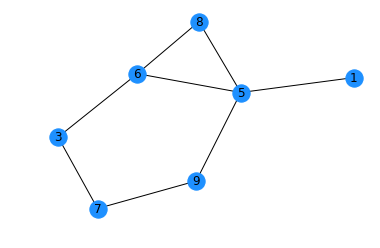

In [30]:
# Graficar el grafo

mis.graph.show_graph()
print()

mis.plot_graph(whit_mis=False)

Evaluating subsets...

Execution time 0.11394529999961378 seconds, or 0.0018990883333268964 minutes

Maximum independent set = {8, 1, 3, 9}



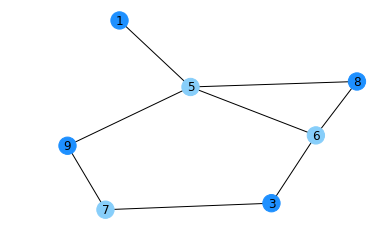

In [31]:
# Graficar el grafo con mis

mis_result, time = mis.maximum_independent_set2(verbose=False)

print('\nExecution time {} seconds, or {} minutes'.format(time, (time/60)))

print('\nMaximum independent set = {}\n'.format(mis_result))

mis.plot_graph(whit_mis=True)

In [26]:
# Probar el algoritmo para distintos tamanios de N

files.reset_result()

for n in range(5, 22):

    porcentaje = 0.10

    matrix = mis.random_matrix_with_porc(n, porcentaje)

    _, time = mis.maximum_independent_set2(verbose=False)

    result = "{},{}\r".format(n, time)

    files.save_result(result)

Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...


In [27]:
import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)
    plt.scatter(nodes, times)

    plt.xlabel('n size')
    plt.ylabel('execution time minutes')

    plt.suptitle('Crecimiento del costo temporal')
    plt.show()

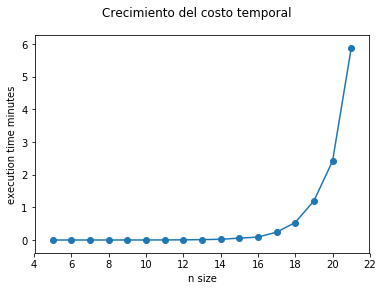

In [28]:
results = files.read_result()

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]) / 60)

plot_historic(nodes, times)